In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.sample(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2174,2015-03-27,Newcastle,11.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,56.0,29.0,NaN,NaN,1.0,0.0,16.5,24.8,No,No
4425,2009-04-16,Wollongong,13.7,22.7,0.0,NaN,NaN,NE,43.0,W,...,32.0,55.0,1014.6,1010.9,NaN,NaN,18.9,22.2,No,No
4209,2017-04-07,Williamtown,12.7,23.3,0.8,NaN,NaN,SE,30.0,NNE,...,89.0,56.0,1027.8,1025.0,8.0,6.0,17.7,22.5,No,No
7468,2012-06-16,PerthAirport,11.0,17.9,1.4,0.2,0.5,NE,28.0,NNW,...,94.0,86.0,1024.4,1022.3,8.0,8.0,14.5,16.7,Yes,Yes


In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

Checking Null Values

<Axes: >

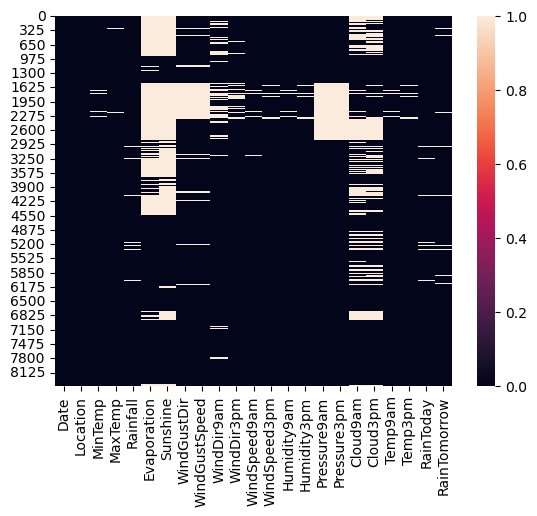

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

The dataset has so many null values that needs to fill up.

In [12]:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].apply(lambda x:x.year)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [13]:
df.drop('Date',axis=1,inplace=True)

In [14]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


Filling missing values

Categorical columns missing values will be filled with mode of the column.

In [16]:
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

Numerical columns missing values will be filled with mean of the column.

In [17]:
numerical_columns=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean()[0])

In [18]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

Now, the dataset has no null values.

Data Visualization

In [19]:
df['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

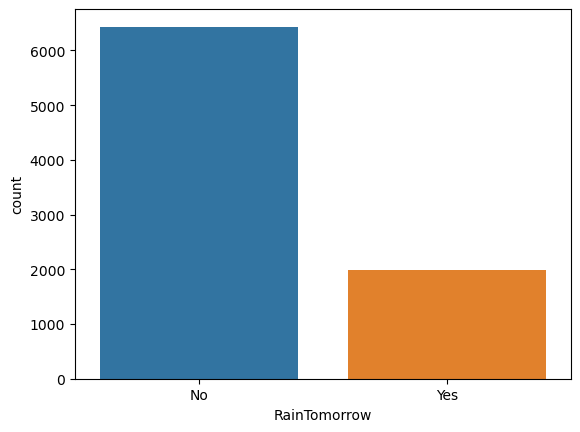

In [20]:
sns.countplot(data=df, x='RainTomorrow')

<Axes: xlabel='Sunshine', ylabel='Rainfall'>

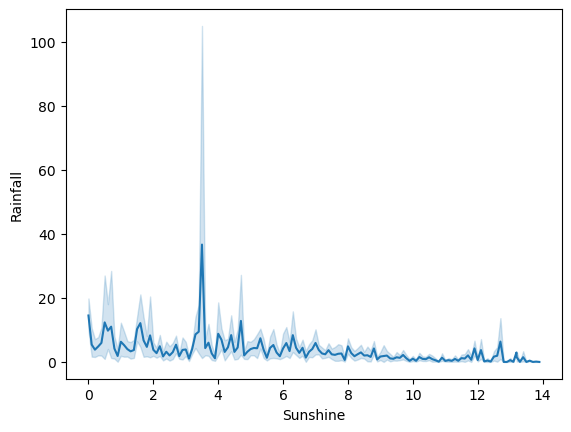

In [21]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall')

<Axes: xlabel='Sunshine', ylabel='Evaporation'>

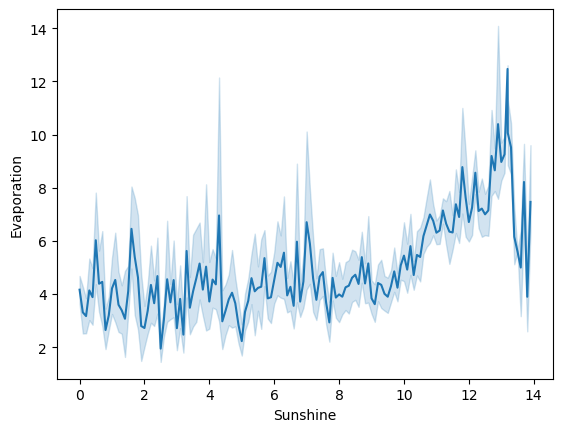

In [22]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation')

<Axes: xlabel='Rainfall', ylabel='count'>

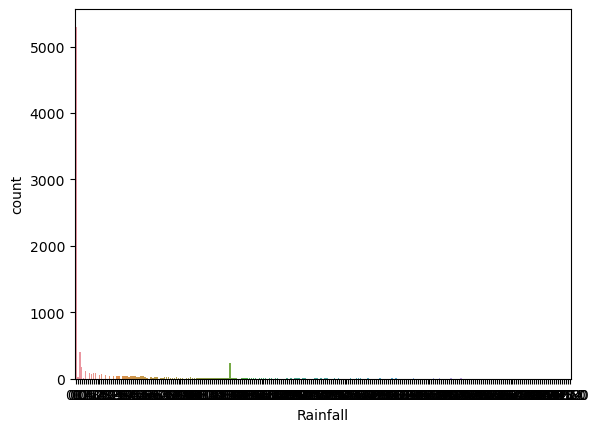

In [23]:
sns.countplot(data=df, x='Rainfall')

In [24]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

Using LabelEncoder for converting Categorical datatype columns to Numerical datatype

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [26]:
df['Location'] = encoder.fit_transform(df['Location'])
df['WindGustDir'] = encoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = encoder.fit_transform(df['WindDir3pm'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

Checking Skewness

array([[<Axes: title={'center': 'Location'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustDir'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindDir9am'}>,
        <Axes: title={'center': 'WindDir3pm'}>],
       [<Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>],
       [<Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RainToday'}>

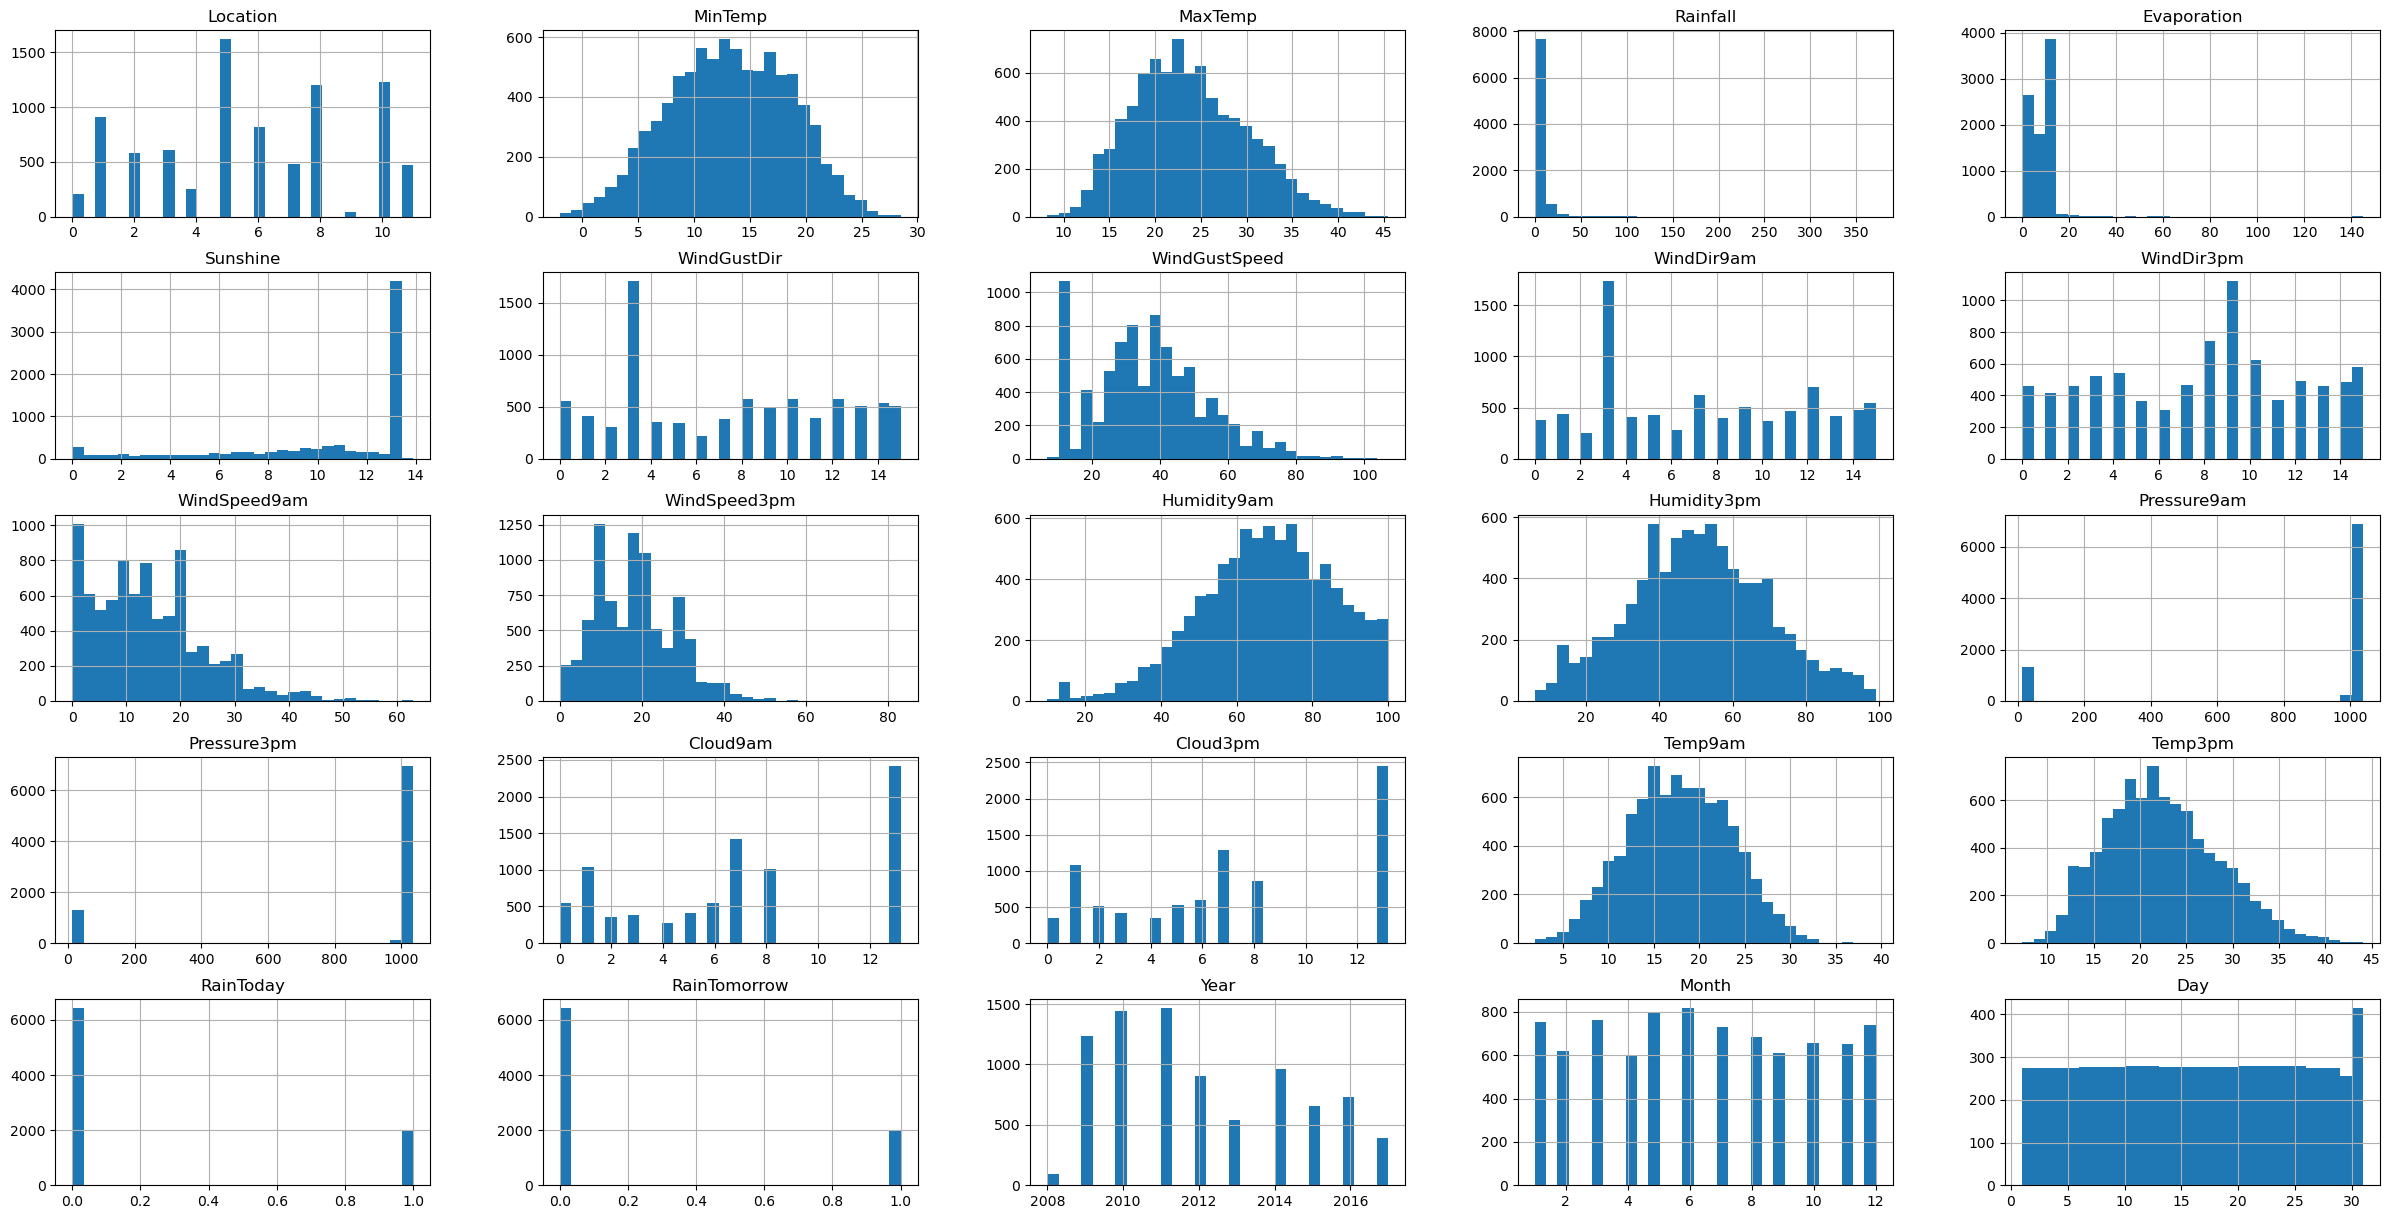

In [28]:
df.hist(bins=30,figsize=(30,15))

RainTomorrow column is normally distributing over the histogram. Other columns are mostly right skewed. So will remove the skeweness using log1p method of numpy.

In [29]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.368943
Rainfall         12.623206
Evaporation       4.187895
Sunshine         -1.239855
WindGustDir       0.119640
WindGustSpeed     0.515200
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.962284
WindSpeed3pm      0.510242
Humidity9am      -0.382172
Humidity3pm       0.082512
Pressure9am      -1.901780
Pressure3pm      -1.898060
Cloud9am          0.069765
Cloud3pm          0.136440
Temp9am          -0.002010
Temp3pm           0.392888
RainToday         1.242362
RainTomorrow      1.241588
Year              0.418663
Month             0.039388
Day               0.004260
dtype: float64

In [30]:
for i in df:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

The skew value for normally distributes is very close to zero, so we are using “log1p” method from numpy library to make the skew value near to zero

In [31]:
df.skew()

Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.368943
Rainfall         1.664139
Evaporation     -0.709354
Sunshine        -1.239855
WindGustDir      0.119640
WindGustSpeed    0.515200
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am    -1.164533
WindSpeed3pm     0.510242
Humidity9am     -0.382172
Humidity3pm      0.082512
Pressure9am     -1.901780
Pressure3pm     -1.898060
Cloud9am         0.069765
Cloud3pm         0.136440
Temp9am         -0.002010
Temp3pm          0.392888
RainToday        1.242362
RainTomorrow     1.241588
Year             0.418663
Month            0.039388
Day              0.004260
dtype: float64

Now, all the columns are normally distributed.

In [32]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.900000,0.470004,2.65277,13.193305,13,44.000000,13,14,...,1007.1,8.000000,13.193305,16.9,21.8,0.0,0.0,2008,12,1
1,1,7.4,25.100000,0.000000,2.65277,13.193305,14,44.000000,6,15,...,1007.8,13.193305,13.193305,17.2,24.3,0.0,0.0,2008,12,2
2,1,12.9,25.700000,0.000000,2.65277,13.193305,15,46.000000,13,15,...,1008.7,13.193305,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1,9.2,28.000000,0.000000,2.65277,13.193305,4,24.000000,9,0,...,1012.8,13.193305,13.193305,18.1,26.5,0.0,0.0,2008,12,4
4,1,17.5,32.300000,0.693147,2.65277,13.193305,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,2.65277,13.193305,0,31.000000,9,1,...,1020.3,13.193305,13.193305,10.1,22.4,0.0,0.0,2017,6,21
8421,9,3.6,25.300000,0.000000,2.65277,13.193305,6,22.000000,9,3,...,1019.1,13.193305,13.193305,10.9,24.5,0.0,0.0,2017,6,22
8422,9,5.4,26.900000,0.000000,2.65277,13.193305,3,37.000000,9,14,...,1016.8,13.193305,13.193305,12.5,26.1,0.0,0.0,2017,6,23
8423,9,7.8,27.000000,0.000000,2.65277,13.193305,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


Checking Outliers

In [33]:
df.shape

(8425, 25)

Location            Axes(0.125,0.747241;0.133621x0.132759)
MinTemp          Axes(0.285345,0.747241;0.133621x0.132759)
MaxTemp           Axes(0.44569,0.747241;0.133621x0.132759)
Rainfall         Axes(0.606034,0.747241;0.133621x0.132759)
Evaporation      Axes(0.766379,0.747241;0.133621x0.132759)
Sunshine            Axes(0.125,0.587931;0.133621x0.132759)
WindGustDir      Axes(0.285345,0.587931;0.133621x0.132759)
WindGustSpeed     Axes(0.44569,0.587931;0.133621x0.132759)
WindDir9am       Axes(0.606034,0.587931;0.133621x0.132759)
WindDir3pm       Axes(0.766379,0.587931;0.133621x0.132759)
WindSpeed9am        Axes(0.125,0.428621;0.133621x0.132759)
WindSpeed3pm     Axes(0.285345,0.428621;0.133621x0.132759)
Humidity9am       Axes(0.44569,0.428621;0.133621x0.132759)
Humidity3pm      Axes(0.606034,0.428621;0.133621x0.132759)
Pressure9am      Axes(0.766379,0.428621;0.133621x0.132759)
Pressure3pm          Axes(0.125,0.26931;0.133621x0.132759)
Cloud9am          Axes(0.285345,0.26931;0.133621x0.13275

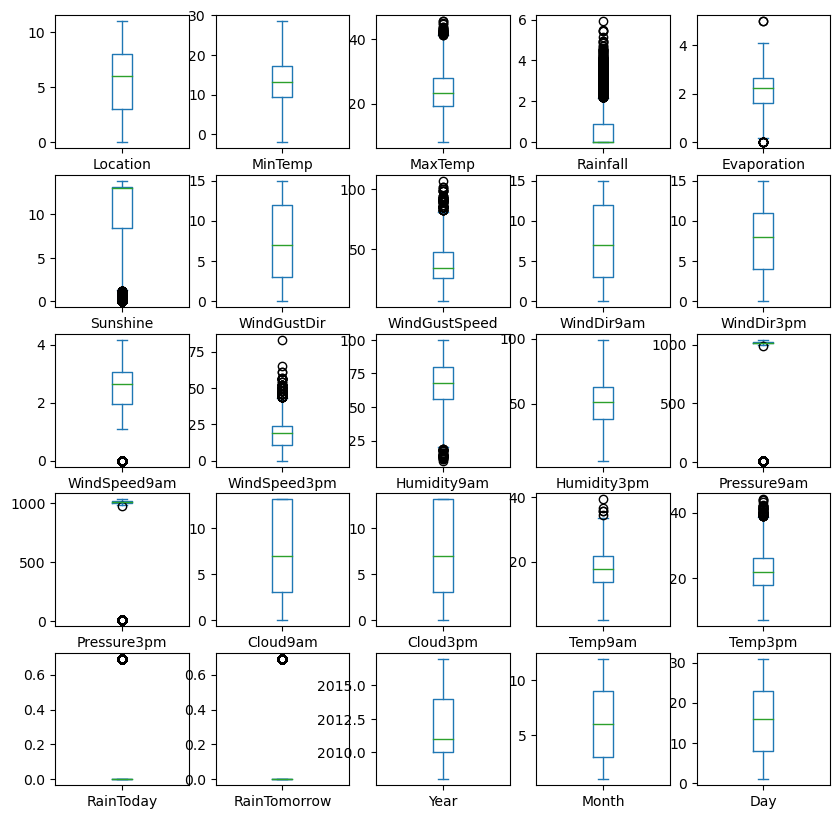

In [34]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,10))

In [35]:
Q1 = df['MaxTemp'].quantile(0.25)
Q3 = df['MaxTemp'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['MaxTemp'] >= lower_bound) & (df['MaxTemp'] <= upper_bound)]

In [36]:

Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Rainfall'] >= lower_bound) & (df['Rainfall'] <= upper_bound)]

In [37]:
Q1 = df['Sunshine'].quantile(0.25)
Q3 = df['Sunshine'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Sunshine'] >= lower_bound) & (df['Sunshine'] <= upper_bound)]

In [38]:
Q1 = df['WindGustSpeed'].quantile(0.25)
Q3 = df['WindGustSpeed'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['WindGustSpeed'] >= lower_bound) & (df['WindGustSpeed'] <= upper_bound)]

In [39]:
Q1 = df['WindSpeed3pm'].quantile(0.25)
Q3 = df['WindSpeed3pm'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['WindSpeed3pm'] >= lower_bound) & (df['WindSpeed3pm'] <= upper_bound)]

In [40]:
Q1 = df['Humidity9am'].quantile(0.25)
Q3 = df['Humidity9am'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Humidity9am'] >= lower_bound) & (df['Humidity9am'] <= upper_bound)]

In [41]:
Q1 = df['Temp9am'].quantile(0.25)
Q3 = df['Temp9am'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Temp9am'] >= lower_bound) & (df['Temp9am'] <= upper_bound)]

In [42]:
Q1 = df['Temp3pm'].quantile(0.25)
Q3 = df['Temp3pm'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Temp3pm'] >= lower_bound) & (df['Temp3pm'] <= upper_bound)]

In [43]:
df.shape

(6674, 25)

Location            Axes(0.125,0.747241;0.133621x0.132759)
MinTemp          Axes(0.285345,0.747241;0.133621x0.132759)
MaxTemp           Axes(0.44569,0.747241;0.133621x0.132759)
Rainfall         Axes(0.606034,0.747241;0.133621x0.132759)
Evaporation      Axes(0.766379,0.747241;0.133621x0.132759)
Sunshine            Axes(0.125,0.587931;0.133621x0.132759)
WindGustDir      Axes(0.285345,0.587931;0.133621x0.132759)
WindGustSpeed     Axes(0.44569,0.587931;0.133621x0.132759)
WindDir9am       Axes(0.606034,0.587931;0.133621x0.132759)
WindDir3pm       Axes(0.766379,0.587931;0.133621x0.132759)
WindSpeed9am        Axes(0.125,0.428621;0.133621x0.132759)
WindSpeed3pm     Axes(0.285345,0.428621;0.133621x0.132759)
Humidity9am       Axes(0.44569,0.428621;0.133621x0.132759)
Humidity3pm      Axes(0.606034,0.428621;0.133621x0.132759)
Pressure9am      Axes(0.766379,0.428621;0.133621x0.132759)
Pressure3pm          Axes(0.125,0.26931;0.133621x0.132759)
Cloud9am          Axes(0.285345,0.26931;0.133621x0.13275

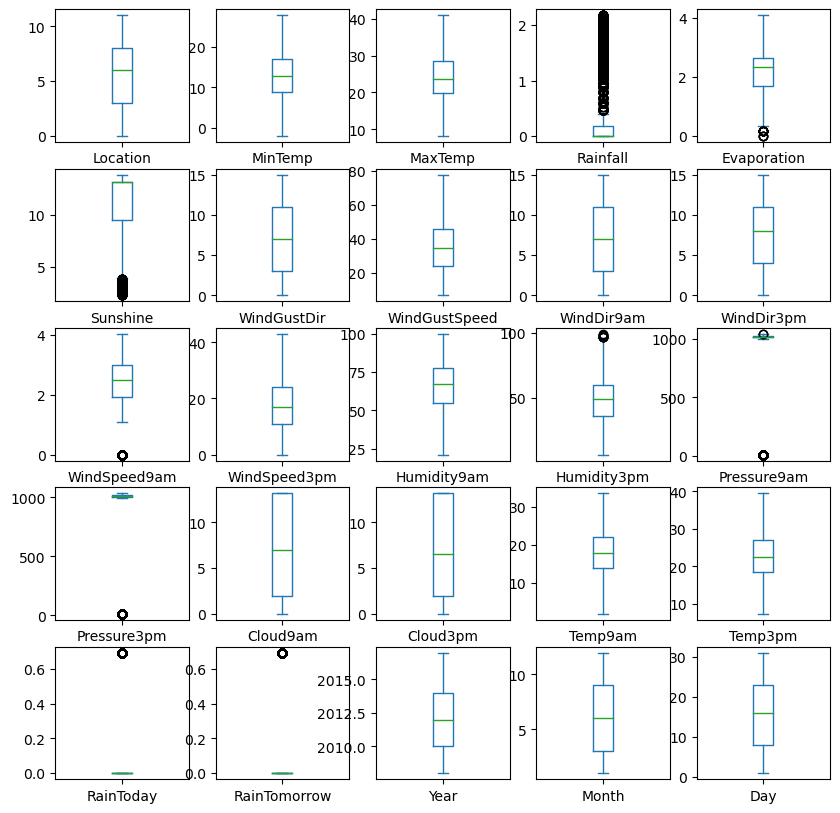

In [44]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(10,10))

We can see most of the outliers are removed now.

Correlation Matrix

<Axes: >

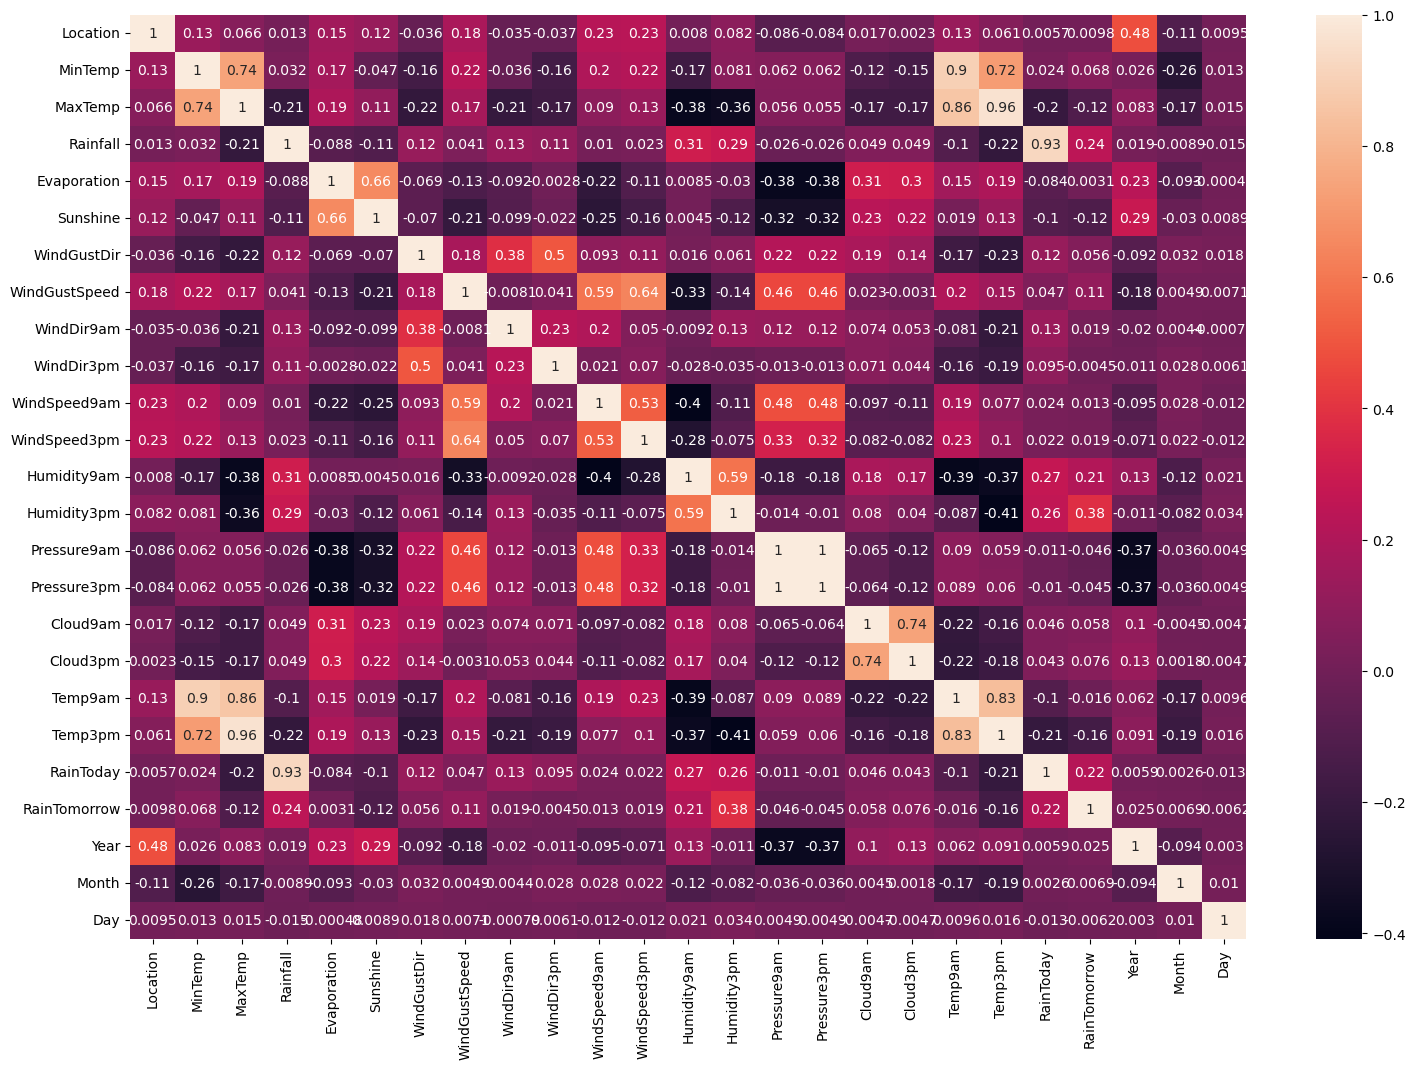

In [45]:
#To check correlation of all the columns with each other

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True)

# Prediction with Rain Tomorrow

# Implementing Machine Learning thru Linear Regression

In [46]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

Seperated target and its features so that x only has input variables and y only has output variable

In [47]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,13.4,22.900000,0.470004,2.65277,13.193305,13,44.000000,13,14,...,1007.7,1007.1,8.000000,13.193305,16.9,21.8,0.0,2008,12,1
1,1,7.4,25.100000,0.000000,2.65277,13.193305,14,44.000000,6,15,...,1010.6,1007.8,13.193305,13.193305,17.2,24.3,0.0,2008,12,2
2,1,12.9,25.700000,0.000000,2.65277,13.193305,15,46.000000,13,15,...,1007.6,1008.7,13.193305,2.000000,21.0,23.2,0.0,2008,12,3
3,1,9.2,28.000000,0.000000,2.65277,13.193305,4,24.000000,9,0,...,1017.6,1012.8,13.193305,13.193305,18.1,26.5,0.0,2008,12,4
4,1,17.5,32.300000,0.693147,2.65277,13.193305,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,2.65277,13.193305,0,31.000000,9,1,...,1024.6,1020.3,13.193305,13.193305,10.1,22.4,0.0,2017,6,21
8421,9,3.6,25.300000,0.000000,2.65277,13.193305,6,22.000000,9,3,...,1023.5,1019.1,13.193305,13.193305,10.9,24.5,0.0,2017,6,22
8422,9,5.4,26.900000,0.000000,2.65277,13.193305,3,37.000000,9,14,...,1021.0,1016.8,13.193305,13.193305,12.5,26.1,0.0,2017,6,23
8423,9,7.8,27.000000,0.000000,2.65277,13.193305,9,28.000000,10,3,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0.0,2017,6,24


In [48]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainTomorrow, Length: 6674, dtype: float64

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4671, 24)
(2003, 24)
(4671,)
(2003,)


In [50]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [51]:
LR.coef_

array([-8.62540389e-03, -9.56596506e-04,  1.14253101e-02,  4.66443259e-02,
        2.36288774e-02, -9.27023242e-03,  2.85197088e-03,  4.49020084e-03,
       -2.61880090e-03, -2.63208455e-03,  1.12899924e-02, -2.63617263e-03,
        3.43933270e-05,  5.70750891e-03, -5.82913116e-05, -3.68819819e-05,
       -1.49817386e-03,  2.19303268e-03,  2.70658947e-04, -1.04505861e-02,
        2.93124574e-02,  9.86779170e-03,  1.69402598e-03, -8.91203152e-04])

In [52]:
LR.intercept_

-20.00079142717612

In [53]:
LR.score(x_train,y_train)

0.22781734443211032

In [54]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [0.18870058 0.16233809 0.15323822 ... 0.45880452 0.1724486  0.45095239]
Actual value 1895    0.000000
7211    0.000000
5816    0.000000
2520    0.000000
1622    0.000000
          ...   
8401    0.000000
4000    0.000000
211     0.693147
4610    0.000000
318     0.693147
Name: RainTomorrow, Length: 2003, dtype: float64


The above data shows the predicted value and the actual value.

In [55]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))

print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 0.05559230259500305
Mean Absolute Error: 0.17189496911032925
Root Mean Squared Error: 0.2357801997518092
R2 Score: 0.23960374231128168


The model has an Root Mean Squared Error score of ~0.23. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

# Using Random Forest Regressor

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5339, 24)
(1335, 24)
(5339,)
(1335,)


In [57]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [58]:
RFR.score(x_train,y_train)

0.924497878491686

The above score shows that the model did really good in its traing phase.

In [59]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [0.07624619 0.23567004 0.01386294 ... 0.08317766 0.18021827 0.13862944]
Actual value 1895    0.000000
7211    0.000000
5816    0.000000
2520    0.000000
1622    0.000000
          ...   
516     0.000000
1020    0.000000
7125    0.000000
4958    0.693147
6452    0.000000
Name: RainTomorrow, Length: 1335, dtype: float64


The above data shows the predicted value and the actual value. We can see that there is not much difference b/w both the data so the model is working good in predicting whether it will rain tomorrow.

In [60]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))

print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 0.035437998372667694
Mean Absolute Error: 0.11750791753133091
Root Mean Squared Error: 0.18824982967500314
R2 Score: 0.5092980245918161


The model has an Root Mean Squared Error score of ~0.18. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

# Prediction with Rainfall

# Implementing Machine Learning thru Linear Regression

In [61]:
x=df.drop(['Rainfall'],axis=1)
y=df['Rainfall']

Seperated target and its features so that x only has input variables and y only has output variable

In [62]:
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.900000,2.65277,13.193305,13,44.000000,13,14,3.044522,...,1007.1,8.000000,13.193305,16.9,21.8,0.0,0.0,2008,12,1
1,1,7.4,25.100000,2.65277,13.193305,14,44.000000,6,15,1.609438,...,1007.8,13.193305,13.193305,17.2,24.3,0.0,0.0,2008,12,2
2,1,12.9,25.700000,2.65277,13.193305,15,46.000000,13,15,2.995732,...,1008.7,13.193305,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1,9.2,28.000000,2.65277,13.193305,4,24.000000,9,0,2.484907,...,1012.8,13.193305,13.193305,18.1,26.5,0.0,0.0,2008,12,4
4,1,17.5,32.300000,2.65277,13.193305,13,41.000000,1,7,2.079442,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,2.65277,13.193305,0,31.000000,9,1,2.639057,...,1020.3,13.193305,13.193305,10.1,22.4,0.0,0.0,2017,6,21
8421,9,3.6,25.300000,2.65277,13.193305,6,22.000000,9,3,2.639057,...,1019.1,13.193305,13.193305,10.9,24.5,0.0,0.0,2017,6,22
8422,9,5.4,26.900000,2.65277,13.193305,3,37.000000,9,14,2.302585,...,1016.8,13.193305,13.193305,12.5,26.1,0.0,0.0,2017,6,23
8423,9,7.8,27.000000,2.65277,13.193305,9,28.000000,10,3,2.639057,...,1016.5,3.000000,2.000000,15.1,26.0,0.0,0.0,2017,6,24


In [63]:
y

0       0.470004
1       0.000000
2       0.000000
3       0.000000
4       0.693147
          ...   
8420    0.000000
8421    0.000000
8422    0.000000
8423    0.000000
8424    0.000000
Name: Rainfall, Length: 6674, dtype: float64

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4671, 24)
(2003, 24)
(4671,)
(2003,)


In [65]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [66]:
LR.score(x_train,y_train)

0.8662290256608617

The above score shows that the model how much model performed in its traing phase.

In [67]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [1.4352104  0.08388813 0.05777873 ... 1.42271285 0.06905713 1.45090556]
Actual value 1895    1.280934
7211    0.000000
5816    0.000000
2520    0.788457
1622    0.000000
          ...   
8401    0.000000
4000    1.163151
211     1.098612
4610    0.000000
318     0.875469
Name: Rainfall, Length: 2003, dtype: float64


The above data shows the predicted value and the actual value.

In [68]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))

print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 0.041913833580405575
Mean Absolute Error: 0.12493067201042599
Root Mean Squared Error: 0.2047286828473372
R2 Score: 0.8613448030468664


The model has an Root Mean Squared Error score of ~0.20. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

# Using Random Forest Regressor

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5339, 24)
(1335, 24)
(5339,)
(1335,)


In [70]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
RFR.score(x_train,y_train)

0.9855466612969754

The above score shows that the model did really good in its traing phase.

In [72]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [1.47689372 0.06205659 0.02375508 ... 0.02460021 0.03792614 0.02516591]
Actual value 1895    1.280934
7211    0.000000
5816    0.000000
2520    0.788457
1622    0.000000
          ...   
516     0.182322
1020    0.000000
7125    0.000000
4958    0.000000
6452    0.000000
Name: Rainfall, Length: 1335, dtype: float64


The above data shows the predicted value and the actual value. We can see that there is not much difference b/w both the data so the model is working good in predicting the amount of rainfall.

In [73]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))

print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 0.032590025881451545
Mean Absolute Error: 0.09909803961021893
Root Mean Squared Error: 0.18052707797294992
R2 Score: 0.8942725088610044


The model has an Root Mean Squared Error score of ~0.18. This implies that lower is the RMSE score, therefore model is performing better at making predictions.